<a href="https://colab.research.google.com/github/RiddhimGupta/MachineLearning/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
800/800 [==============================] - 55s 69ms/step - loss: 1.5830 - accuracy: 0.4153 - val_loss: 1.3045 - val_accuracy: 0.5258
Epoch 2/10
800/800 [==============================] - 57s 72ms/step - loss: 1.1994 - accuracy: 0.5709 - val_loss: 1.0919 - val_accuracy: 0.6105
Epoch 3/10
800/800 [==============================] - 55s 68ms/step - loss: 1.0105 - accuracy: 0.6403 - val_loss: 0.9969 - val_accuracy: 0.6483
Epoch 4/10
800/800 [==============================] - 55s 69ms/step - loss: 0.8891 - accuracy: 0.6855 - val_loss: 0.9464 - val_accuracy: 0.6718
Epoch 5/10
800/800 [==============================] - 55s 68ms/step - loss: 0.7961 - accuracy: 0.7191 - val_loss: 0.9112 - val_accuracy: 0.6844
Epoch 6/10
800/800 [==============================] - 55s 69ms/step - loss: 0.7091 - accuracy: 0.7507 - val_loss: 0.9052 - val_accuracy: 0.6908
Epoch 7/10
800/800 [==============================] - 54s 68ms/step - loss: 0.6373 - accuracy: 0.7768 - val_loss: 0.9192 - val_accuracy:

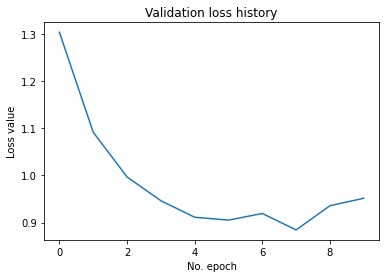

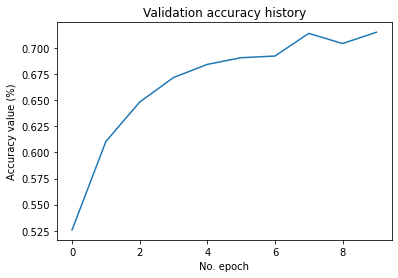

In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 10
no_epochs = 10
optimizer = Adam()
validation_split = 0.2
verbosity = 1

# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])

# Fit data to model
history = model.fit(input_train, target_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            validation_split=validation_split)


# Generate generalization metrics
score = model.evaluate(input_test, target_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

# Visualize history
# Plot history: Loss
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()



In [6]:
#Prediction
model.save("model1_cifar_10epoch.h5")
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
from PIL import Image
import numpy as np
im=Image.open("dog.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
 
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

5 dog
